## Ejercicios con Clustering, tercer semana del taller

## Clustering usando k-means 

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt 
from sklearn import cluster     # sklearn es grande, por ello sólo importamos un módulo, prueba a cargarla toda en memoria

In [3]:
# Estos detalle técnicos, checan una variable de entorno (para que el código sea ejecutable en varios S.O)
import os # módulo con funciones del sistema operativo como abrir y leer archivos
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

In [4]:
cities = pd.read_csv('Cities.csv') # leemos nuestra fuente de información
                                   # recuerda: en la vida real, pocas veces tu data set esta completo, limpio y ordenado 
                                   # en general existe una convención para la forma puedes checar el 
                                   # artículo de https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf

In [8]:
cities.head()

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62


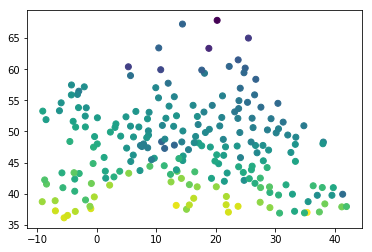

In [9]:
plt.scatter(cities['longitude'], cities['latitude'], c=cities['temperature']) # un poco de EDA
plt.show()

In [6]:
kmeans = cluster.KMeans(10)  # inicialización del objeto ¿por qué no revisas qué clase tiene?, para qué sirve el parámetro 
                             # que recibe?
kmeans.fit(cities[['longitude', 'latitude']])  # adivina qué variables está utilizando para medir similaridad, 
                                               # te parece correcto?
                                               # puedes estimar cuántas operaciones realiza esta línea?

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
type(kmeans)

sklearn.cluster.k_means_.KMeans

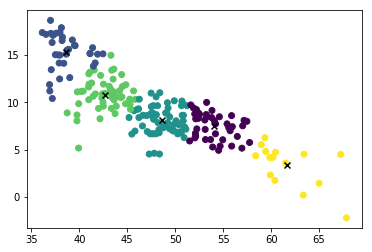

In [5]:
kmeans = cluster.KMeans(5)     # qué tan sensible será al número de clusters? 
kmeans.fit(cities[['latitude', 'temperature']]) # o al número de variables que elijamos?
                                # OJO: AQUI COMETIMOS UN 'ERROR' cuál es??
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['latitude'], cities['temperature'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()